<a href="https://colab.research.google.com/github/DataMinati/Super-Notebooks-100/blob/main/Coursera_Course_Recommendation_Engine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
sns.set_style('darkgrid')
plt.style.use('fivethirtyeight')
print("The necessary packages are included successfully!")

The necessary packages are included successfully!


## 2. Importing the dataset


In [2]:
url = 'https://raw.githubusercontent.com/MainakRepositor/Datasets-/master/Coursera.csv'
df = pd.read_csv(url)
df.head()

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...
1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,4.8,https://www.coursera.org/learn/canvas-analysis...,"By the end of this guided project, you will be...",Finance business plan persona (user experien...
2,Silicon Thin Film Solar Cells,�cole Polytechnique,Advanced,4.1,https://www.coursera.org/learn/silicon-thin-fi...,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...
3,Finance for Managers,IESE Business School,Intermediate,4.8,https://www.coursera.org/learn/operational-fin...,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...
4,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,Beginner,4.6,https://www.coursera.org/learn/single-table-sq...,In this course you�ll learn how to effectively...,Data Analysis select (sql) database manageme...


##3. Data Cleaning

In [3]:
# This dataframe contains some useless columns which must be dropped for a better analytics result
uc = ['Course URL']  # uc means useless columns
df = df.drop(columns=uc)
df.head()

,Course Name,University,Difficulty Level,Course Rating,Course Description,Skills
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...
1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,4.8,"By the end of this guided project, you will be...",Finance business plan persona (user experien...
2,Silicon Thin Film Solar Cells,�cole Polytechnique,Advanced,4.1,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...
3,Finance for Managers,IESE Business School,Intermediate,4.8,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...
4,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,Beginner,4.6,In this course you�ll learn how to effectively...,Data Analysis select (sql) database manageme...


##4. Data Inferencing

In [4]:
r,c = df.shape
print("Number of customers  = ",r)
print("Number of parameters = ",c)

Number of customers  =  3522
Number of parameters =  6


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3522 entries, 0 to 3521
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Course Name         3522 non-null   object
 1   University          3522 non-null   object
 2   Difficulty Level    3522 non-null   object
 3   Course Rating       3522 non-null   object
 4   Course Description  3522 non-null   object
 5   Skills              3522 non-null   object
dtypes: object(6)
memory usage: 165.2+ KB


##5. NULL Removal / Checking

In [6]:
print("Are there any missing values in the dataset ?",df.isna().values.any())

Are there any missing values in the dataset ? False


In [7]:
# complete summary of dataset
df.describe().T

,count,unique,top,freq
Course Name,3522,3416,Google Cloud Platform Fundamentals: Core Infra...,8
University,3522,184,Coursera Project Network,562
Difficulty Level,3522,5,Beginner,1444
Course Rating,3522,31,4.7,740
Course Description,3522,3397,This course introduces you to important concep...,8
Skills,3522,3424,Google Cloud Platform Big Data Cloud Infrast...,8


## 6. Data Visualization

In [8]:
data = df['Difficulty Level'].value_counts()
data

Beginner          1444
Advanced          1005
Intermediate       837
Conversant         186
Not Calibrated      50
Name: Difficulty Level, dtype: int64

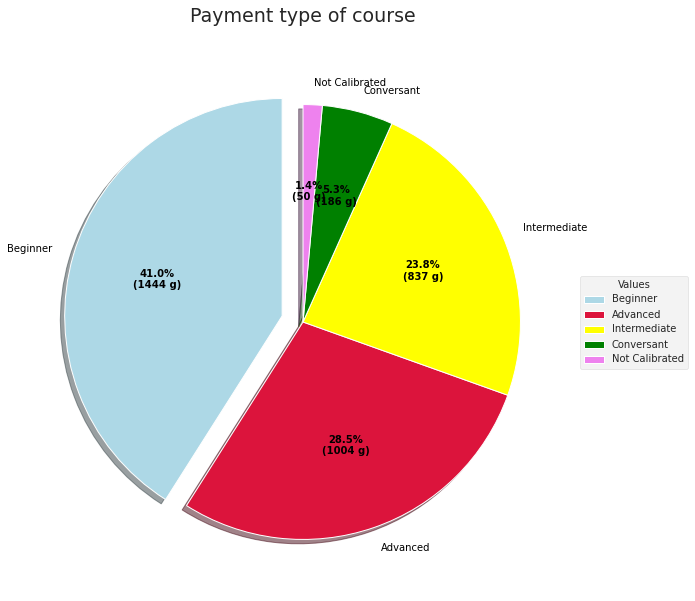

In [9]:
mag = ['Beginner','Advanced','Intermediate','Conversant','Not Calibrated']
  
data = [1444,1005,837,186,50]
explode = (0.1,0.0,0.0,0.0,0.0) 
  
# Creating color parameters 
colors = ("lightblue","crimson","yellow","green","violet") 
  
# Wedge properties 
wp = { 'linewidth' : 1, 'edgecolor' : "white" } 
  
# Creating autocpt arguments 
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%\n({:d} g)".format(pct, absolute) 
  
# Creating plot 
fig, ax = plt.subplots(figsize =(15, 10)) 
wedges, texts, autotexts = ax.pie(data,  
                                  autopct = lambda pct: func(pct, data), 
                                  explode = explode,  
                                  labels = mag, 
                                  shadow = True, 
                                  colors = colors, 
                                  startangle = 90, 
                                  wedgeprops = wp, 
                                  textprops = dict(color ="black")) 
  
# Adding legend 
ax.legend(wedges, mag, 
          title ="Values", 
          loc ="center left", 
          bbox_to_anchor =(1, 0, 0.5, 1)) 
  
plt.setp(autotexts, size = 10, weight ="bold") 
ax.set_title("Payment type of course\n",size=19) 
  
# show plot 

plt.show()

In [10]:
df['Course Rating'].value_counts()

4.7               740
4.6               623
4.8               598
4.5               389
4.4               242
4.9               180
4.3               165
4.2               121
5                  90
4.1                85
Not Calibrated     82
4                  51
3.8                24
3.9                20
3.7                18
3.6                18
3.5                17
3.4                13
3                  12
3.2                 9
3.3                 6
2.9                 6
1                   2
2.4                 2
2.6                 2
2.8                 2
1.9                 1
3.1                 1
2.3                 1
2.5                 1
2                   1
Name: Course Rating, dtype: int64

In [11]:
df = df[df['Course Rating'] != 'Not Calibrated']
df['Course Rating'] = df['Course Rating'].astype(float)
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Course Name,University,Difficulty Level,Course Rating,Course Description,Skills
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...
1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,4.8,"By the end of this guided project, you will be...",Finance business plan persona (user experien...
2,Silicon Thin Film Solar Cells,�cole Polytechnique,Advanced,4.1,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...
3,Finance for Managers,IESE Business School,Intermediate,4.8,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...
4,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,Beginner,4.6,In this course you�ll learn how to effectively...,Data Analysis select (sql) database manageme...
...,...,...,...,...,...,...
3517,"Capstone: Retrieving, Processing, and Visualiz...",University of Michigan,Beginner,4.6,"In the capstone, students will build a series ...",Databases syntax analysis web Data Visuali...
3518,Patrick Henry: Forgotten Founder,University of Virginia,Intermediate,4.9,"�Give me liberty, or give me death:� Rememberi...",retirement Causality career history of the ...
3519,Business intelligence and data analytics: Gene...,Macquarie University,Advanced,4.6,�Megatrends� heavily influence today�s organis...,analytics tableau software Business Intellig...
3520,Rigid Body Dynamics,Korea Advanced Institute of Science and Techno...,Beginner,4.6,"This course teaches dynamics, one of the basic...",Angular Mechanical Design fluid mechanics F...


Text(0.5, 1.0, 'Count of course types\n')

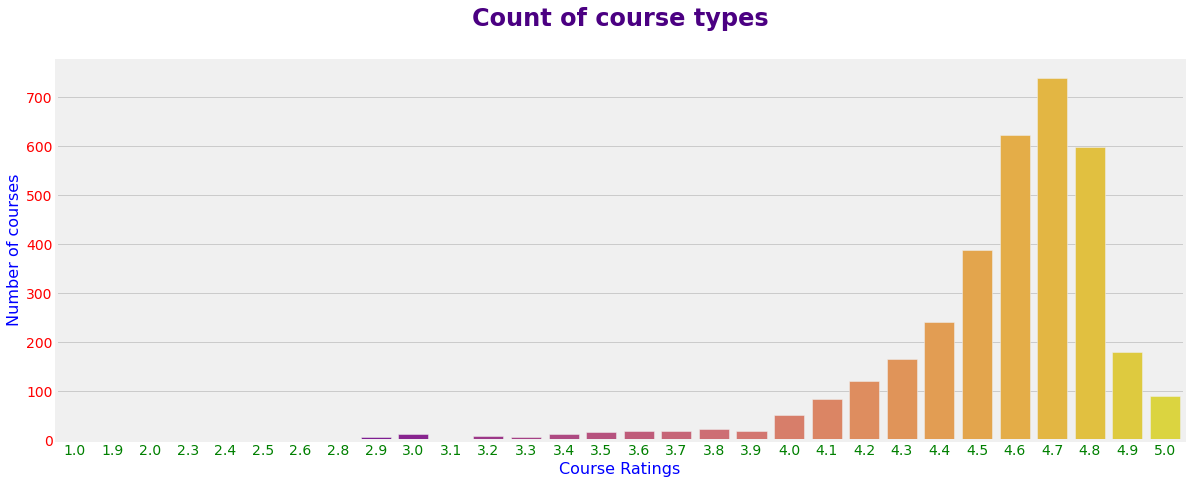

In [12]:
plt.figure(figsize=(18,7))
sns.countplot(data=df,x='Course Rating',palette='plasma')
plt.xlabel('Course Ratings',fontsize='16',color='blue')
plt.ylabel('Number of courses',fontsize='16',color='blue')
plt.xticks(fontsize='14',color='green')
plt.yticks(fontsize='14',color='red')
plt.title("Count of course types\n",fontsize=24,fontweight='bold',color='indigo')

##7. Filterning required data

In [13]:
df2 = df[df['Course Rating'] > 4.0]
df2.head(10)

,Course Name,University,Difficulty Level,Course Rating,Course Description,Skills
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...
1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,4.8,"By the end of this guided project, you will be...",Finance business plan persona (user experien...
2,Silicon Thin Film Solar Cells,�cole Polytechnique,Advanced,4.1,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...
3,Finance for Managers,IESE Business School,Intermediate,4.8,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...
4,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,Beginner,4.6,In this course you�ll learn how to effectively...,Data Analysis select (sql) database manageme...
5,Building Test Automation Framework using Selen...,Coursera Project Network,Beginner,4.7,Selenium is one of the most widely used functi...,maintenance test case test automation scree...
7,"Programming Languages, Part A",University of Washington,Intermediate,4.9,This course is an introduction to the basic co...,inference ml (programming language) higher-o...
8,The Roles and Responsibilities of Nonprofit Bo...,The State University of New York,Intermediate,4.3,This course provides a more in-depth look at t...,Planning Peer Review fundraising strategic ...
11,Esports Management Capstone Project,"University of California, Irvine",Beginner,4.4,We will analyze the pros and cons of creating ...,Average Planning Leadership and Management ...
13,Business Statistics and Analysis Capstone,Rice University,Beginner,4.7,The Business Statistics and Analysis Capstone ...,Statistical Analysis Microsoft Excel busines...


##8. Making NLP Model for Recommendation Engine

In [14]:
cv=TfidfVectorizer()
tfidf_matrix=cv.fit_transform(df['Course Name'])
course_user = df.pivot_table(columns='Course Name',values='Course Rating')
course_user.head()

Course Name,"""Making"" Progress Teach-Out",3-Axis Machining with Autodesk Fusion 360,3D Art and Audio Pipeline,3D CAD Application,3D CAD Fundamental,3D Data Visualization for Science Communication,3D Graphics in Android: Sensors and VR,3D Interaction Design in Virtual Reality,3D Interactions and Navigation,3D Model Creation with Autodesk Fusion 360,3D Models for Virtual Reality,3D Printing Applications,3D Printing Capstone,3D Printing Hardware,3D Printing Software,A Brief History of Human Spaceflight,A Business Approach to Sustainable Landscape Restoration,A Circular Economy of Metals: Towards a Sustainable Societal Metabolism,A Complete Reinforcement Learning System (Capstone),A Crash Course in Data Science,A Geometrical Approach to Genome Analysis: Skew & Z-Curve,A Guide to Healthcare Innovation: Principles and Practice,A Journey through Western Christianity: from Persecuted Faith to Global Religion (200 - 1650),A Law Student's Toolkit,A Life of Happiness and Fulfillment,A Scientific Approach to Innovation Management,A Start Guide: Product Marketing Using G Suite,A Voice of Their Own. Women's Spirituality in the Middle Ages.,A tecnologia da produ��o musical,ADHD: Everyday Strategies for Elementary Students,AI Capstone Project with Deep Learning,AI For Everyone,AI For Medical Treatment,AI Workflow: AI in Production,AI Workflow: Business Priorities and Data Ingestion,AI Workflow: Data Analysis and Hypothesis Testing,AI Workflow: Enterprise Model Deployment,AI Workflow: Feature Engineering and Bias Detection,"AI Workflow: Machine Learning, Visual Recognition and NLP",AI for Medical Diagnosis,...,When Disaster Meets Conflict,Whole genome sequencing of bacterial genomes - tools and applications,Why Iowa? A Primer on Primaries and Caucuses Teach-Out,"William Shakespeare's Twelfth Night: Comedy, Conflict, and Community",Wind Energy,Wind resources for renewable energies,Windows Server Management and Security,Wine Tasting: Sensory Techniques for Wine Analysis,Wireless Communications for Everybody,Wireshark for Basic Network Security Analysis,Women in Leadership: Inspiring Positive Change,Women in environmental biology,Wood Science: Beyond Building,Words Spun Out of Images: Visual and Literary Culture in Nineteenth Century Japan,"Work Smarter, Not Harder: Time Management for Personal & Professional Productivity",World Design for Video Games,Write A Feature Length Screenplay For Film Or Television,Write Like Mozart: An Introduction to Classical Music Composition,Write Professional Emails in English,Write Your First Novel,Writing Professional Email and Memos (Project-Centered Course),Writing Skills for Engineering Leaders,Writing Stories About Ourselves,Writing Winning Resumes and Cover Letters,Writing a Personal Essay,Writing and Editing: Drafting,Writing and Editing: Revising,Writing and Editing: Structure and Organization,Writing and Editing: Word Choice and Word Order,Writing for Young Readers: Opening the Treasure Chest,Writing in English at University,Writing in First Person Point of View,Writing your World: Finding yourself in the academic space,e-Learning Ecologies: Innovative Approaches to Teaching and Learning for the Digital Age,eHealth: More than just an electronic record,iOS App Development Basics,iOS App Store & In-App Purchases,iOS Project: Transreality Game,iPad Music Player in XD,idea 2 IMPACT: An Introduction to Translating Assistive Health Technologies and Other Products
Course Rating,4.2,4.9,4.3,4.9,4.6,4.3,4.6,4.5,4.5,4.7,4.6,4.5,4.2,3.9,4.6,4.2,4.7,4.7,4.6,4.4,5.0,4.6,4.7,4.6,4.7,4.4,4.7,4.4,4.8,4.7,4.2,4.8,4.6,4.2,4.1,4.2,4.2,4.5,4.6,4.5,...,4.8,4.5,4.5,4.4,4.7,3.7,4.6,4.5,4.7,4.4,4.7,4.6,4.6,4.8,4.4,4.3,4.8,4.9,4.7,3.5,4.2,4.7,3.7,4.7,4.4,4.8,4.8,4.6,4.6,4.6,4.7,4.6,4.7,4.2,4.5,4.2,4.5,4.9,4.4,1.0


In [15]:
df = df.rename(columns={'Course Name':'course_title'})

##9. Running Recommendation Engine on variety of course genres

In [16]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
indices=pd.Series(df.index,index=df['course_title'])
titles=df['course_title']
def recommendations(course_title):
    idx = indices[course_title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    course_indices = [i[0] for i in sim_scores]
    return titles.iloc[course_indices]
print("--------------- Similar courses to your search --------------:\n")
recommendations('Write A Feature Length Screenplay For Film Or Television')

--------------- Similar courses to your search --------------:



149                      Scandinavian Film and Television
2485                                  Feature Engineering
1481    Script Writing: Write a Pilot Episode for a TV...
2858         Machine Learning Feature Selection in Python
3070            Perform Feature Analysis with Yellowbrick
1854    Data Processing and Feature Engineering with M...
1629                               Write Your First Novel
650                  Write Professional Emails in English
2385                     Getting Your Film off the Ground
2472    Python: Imputations, Feature Creation & Statis...
Name: course_title, dtype: object

In [17]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
indices=pd.Series(df.index,index=df['course_title'])
titles=df['course_title']
def recommendations(course_title):
    idx = indices[course_title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    course_indices = [i[0] for i in sim_scores]
    return titles.iloc[course_indices]
print("--------------- Similar courses to your search --------------:\n")
recommendations('Retrieve Data using Single-Table SQL Queries')

--------------- Similar courses to your search --------------:



3272        Retrieve Data with Multiple-Table SQL Queries
1162       Advanced SQL Retrieval Queries in SQLiteStudio
1580                                 SQL for Data Science
3482                SQL for Data Science Capstone Project
2892                           Manipulating Data with SQL
2611                          Analyzing Big Data with SQL
2934    How to Design a Space-Saving Table Using SketchUp
1033                   Databases and SQL for Data Science
1379                   Databases and SQL for Data Science
1380                   Databases and SQL for Data Science
Name: course_title, dtype: object

In [18]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
indices=pd.Series(df.index,index=df['course_title'])
titles=df['course_title']
def recommendations(course_title):
    idx = indices[course_title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    course_indices = [i[0] for i in sim_scores]
    return titles.iloc[course_indices]
print("--------------- Similar courses to your search --------------:\n")
recommendations('Finance for Managers')

--------------- Similar courses to your search --------------:



419                    Finance for Non-Financial Managers
2082                Finance for Non-Finance Professionals
3448                                 Finance for Startups
3094    Coding for Designers, Managers, & Entrepreneurs I
653     Coding for Designers, Managers, & Entrepreneur...
1659    Coding for Designers, Managers, & Entrepreneur...
2851                        Finance for Everyone: Markets
3110                          Finance For Everyone: Value
959                 Finance for Everyone Capstone Project
2188    Human Resources Management Capstone: HR for Pe...
Name: course_title, dtype: object